<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

외울거

In [ ]:
1. numpy
랜덤의 시드를 정하는 방법                                   - np.random.seed(42)
특정 구간의 정수를 차례대로 반환하는 방법                   - index = np.arange(49)
랜덤 섞기                                                   - np.random.shuffle(index)
서로 다른 두 개 리스트에서 하나씩 빼서 하나의 원소로 만드는 - np.column_stack()
0,1로이루어진 거 만들고 합치기 방법                         - np.concatenate((np.ones(35), np.zeros(14)))

2. sklearn
train/test 데이터셋 쉽게 만들기 + 층화                      - from sklearn.model_selection import train_test_split

   .

#데이터 만들기

In [14]:
import numpy as np

In [15]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [16]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1.]


In [25]:
#train/test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [26]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

#25cm에 150g인 녀석은 왜 빙어인걸까?

In [28]:
kn.predict([[25,150]])

array([0.])

In [46]:
distances, indexes = kn.kneighbors([[25,150]]) #얘랑 가까운 5개의 데이터 꺼내보기
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


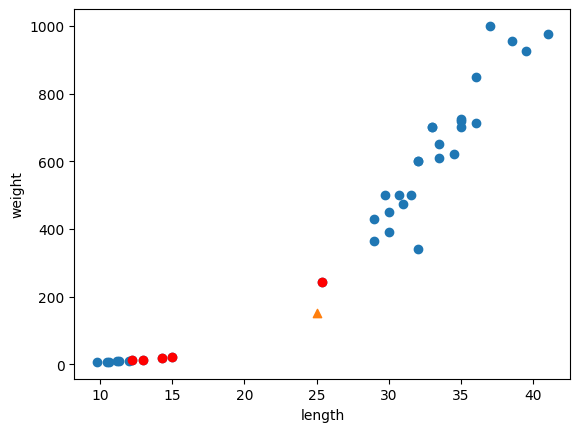

In [40]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], color='red')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
kn.kneighbors([[25,150]]) #정답 : 가로의 길이가 영향을 끼치지 못함! 정규화 필요!

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

#정규화

In [52]:
train_input[:5]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 11.3,   8.7],
       [ 39.5, 925. ]])

In [49]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [53]:
train_scaled = (train_input-mean)/std

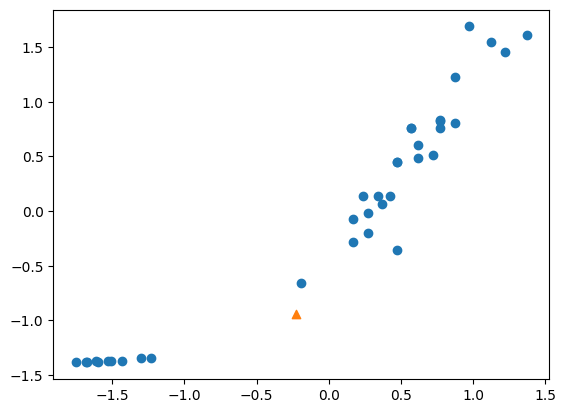

In [55]:
new = ([25,150]-mean)/std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.show()

#다시 훈련

In [58]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

test_scaled = (test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

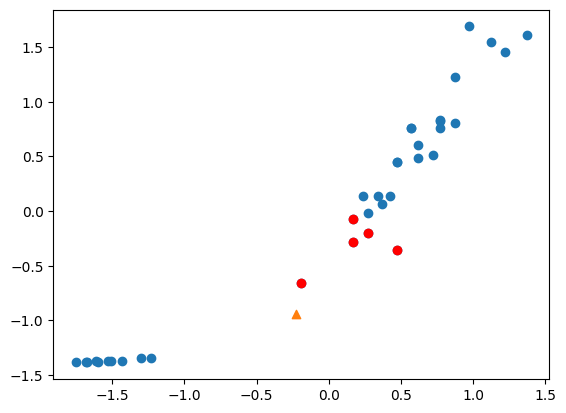

In [63]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], color='red')
plt.scatter(new[0], new[1], marker='^')
plt.scatter

plt.show()